In [9]:
import os
import time

import pandas as pd
import statsmodels.api as sm
import numpy as np
# from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib as mpl
# mpl.use('Qt5Agg')
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
"""Load data as data frame"""
src_train = '/home/melandur/Data/Myocarditis/csv/train/7_merged/'
src_test = '/home/melandur/Data/Myocarditis/csv/test/7_merged/'

def load_data(path):
    files = os.listdir(path)
    df_store = {}
    for file in files:
        if 'aha' in file and 'sample' not in file:
            file_path = os.path.join(path, file)
            df = pd.read_excel(file_path, )
            name = f"{file.split('_')[1]}_{file.split('_')[-1]}".split('.xlsx')[0]
            df_store[name] = df.iloc[:, 1:]  # drop first column
    return df_store

df_train = load_data(src_train)
df_test = load_data(src_test)

In [67]:
def euclider(store):
    euclid_store = {}
    for idx in range(1, 17):
        df_longit = store[f'longit_{idx}']
        df_circumf = store[f'circumf_{idx}']
        df_radial = store[f'radial_{idx}']

        # euclid distance
        # df_longit = abs(df_longit.iloc[:, 1:]) ** 2
        # df_circumf = abs(df_circumf.iloc[:, 1:]) ** 2
        # df_radial = abs(df_radial.iloc[:, 1:]) ** 2
        #
        # df_longit + df_circumf.values + df_radial.values
        # euclid_store[f'{idx}'] = df_longit ** (1 / 2)
        euclid_store[f'{idx}'] = df_radial.iloc[:, 1:]
    return euclid_store

df_e_train = euclider(df_train)
df_e_test = euclider(df_test)

In [ ]:
"""QQ plots"""
data = df_train['longit_1']
for case in data.columns:
    for strain in ['longit', 'radial', 'circumf']:
        fig, ax = plt.subplots(4, 4)
        plt.title(f'{case}_{strain}')
        sm.qqplot(df_train[f'{strain}_1'][case], line='s', ax=ax[0, 0])
        sm.qqplot(df_train[f'{strain}_2'][case], line='45', ax=ax[0, 1])
        sm.qqplot(df_train[f'{strain}_3'][case], line='45', ax=ax[0, 2])
        sm.qqplot(df_train[f'{strain}_4'][case], line='45', ax=ax[0, 3])
        sm.qqplot(df_train[f'{strain}_5'][case], line='45', ax=ax[1, 0])
        sm.qqplot(df_train[f'{strain}_6'][case], line='45', ax=ax[1, 1])
        sm.qqplot(df_train[f'{strain}_7'][case], line='45', ax=ax[1, 2])
        sm.qqplot(df_train[f'{strain}_8'][case], line='45', ax=ax[1, 3])
        sm.qqplot(df_train[f'{strain}_9'][case], line='45', ax=ax[2, 0])
        sm.qqplot(df_train[f'{strain}_10'][case], line='45', ax=ax[2, 1])
        sm.qqplot(df_train[f'{strain}_11'][case], line='45', ax=ax[2, 2])
        sm.qqplot(df_train[f'{strain}_12'][case], line='45', ax=ax[2, 3])
        sm.qqplot(df_train[f'{strain}_13'][case], line='45', ax=ax[3, 0])
        sm.qqplot(df_train[f'{strain}_14'][case], line='45', ax=ax[3, 1])
        sm.qqplot(df_train[f'{strain}_15'][case], line='45', ax=ax[3, 2])
        sm.qqplot(df_train[f'{strain}_16'][case], line='45', ax=ax[3, 3])
        plt.show()

In [ ]:
def stack_point_cords_list(store, idx, threshold):
    for i, case in enumerate(store[f'longit_{idx}'].columns):
        if i == 0:
            lon = store[f'longit_{idx}'][case].tolist()
            rad = store[f'radial_{idx}'][case].tolist()
            cir = store[f'circumf_{idx}'][case].tolist()
        elif i < threshold:  # overflows
            lon.extend(store[f'longit_{idx}'][case].tolist())
            rad.extend(store[f'radial_{idx}'][case].tolist())
            cir.extend(store[f'circumf_{idx}'][case].tolist())
    return lon, rad, cir

x_train1, y_train1, z_train1 = stack_point_cords(df_train, idx, threshold)
x_test1, y_test1, z_test1 = stack_point_cords(df_test, idx, threshold)

In [31]:
threshold = 51
idx = 1
def merge_columns(store, idx, threshold):
    lon = store[f'longit_{idx}'].iloc[:, :threshold]
    data = lon.melt()
    rad = store[f'radial_{idx}'].iloc[:, :threshold]
    rad = rad.melt()
    data = pd.concat([data, rad], axis=1)
    cir = store[f'circumf_{idx}'].iloc[:, :threshold]
    cir = cir.melt()
    data = pd.concat([data, cir], axis=1)
    data = data.drop(['variable'], axis=1)
    header = ['longit', 'radial', 'circumf']
    data.columns = header
    return data

def fused_columns(store_1, store_2, idx, threshold):
    value_l1 = store_1[f'longit_{idx}'].iloc[:, :threshold]
    value_l1 = value_l1.melt()
    value_l2 = store_2[f'longit_{idx}'].iloc[:, :threshold]
    value_l2 = value_l2.melt()
    value_r1 = store_1[f'radial_{idx}'].iloc[:, :threshold]
    value_r1 = value_r1.melt()
    value_r2 = store_2[f'radial_{idx}'].iloc[:, :threshold]
    value_r2 = value_r2.melt()
    value_c1 = store_1[f'circumf_{idx}'].iloc[:, :threshold]
    value_c1 = value_c1.melt()
    value_c2 = store_2[f'circumf_{idx}'].iloc[:, :threshold]
    value_c2 = value_c2.melt()

    data = pd.concat([value_l1, value_l2, value_r1, value_r2, value_c1, value_c2], axis=1)
    data = data.drop(['variable'], axis=1)
    header = ['longit_affected', 'longit_control', 'radial_affected', 'radial_control', 'circumf_affected', 'circumf_control']
    data.columns = header
    return data

# df_train = merge_columns(df_train, idx, threshold)
# df_test = merge_columns(df_test, idx, threshold)
df_fused = fused_columns(df_train, df_test, idx, threshold)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(f'AHA segment {idx}')
ax.set_xlabel('longit', fontweight ='bold')
ax.set_ylabel('radial', fontweight ='bold')
# ax.set_zlabel('circumf', fontweight ='bold')
ax.(x_train, y_train)
# ax.hist2d(x_test, z_test, color='blue', alpha=0.5)
plt.show()

<Figure size 640x480 with 0 Axes>

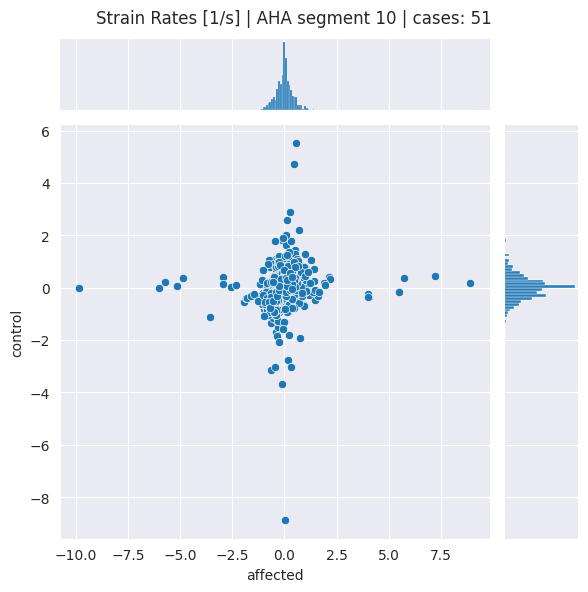

In [26]:
fig = plt.figure()
g = sns.jointplot(data=df_fused, x='affected', y='control')
g.plot(sns.scatterplot, sns.histplot)

# g.move_legend(ax, "upper left", bbox_to_anchor=(2, 1))

# plt.title(, y=1.2, x=-3)
# plt.xlabel('Longitudinal', size=16, fontstyle='italic', weight=900)
# plt.ylabel('Total Sales', size=16, family='monospace')
g.fig.subplots_adjust(top=0.93) # adjust the Figure in rp
g.fig.suptitle(f'Strain Rates [1/s] | AHA segment {idx} | cases: {threshold}')
# g.ax_joint.set_xlabel('Longitudinal')
# g.ax_joint.set_ylabel('Radial')
plt.savefig(f'/home/melandur/plot/aha_seg_3d_{idx}.png', dpi=300)
# sns.jointplot(data=df_test, x='longit', y='circumf')
# sns.jointplot(data=df_test, x='radial', y='circumf')

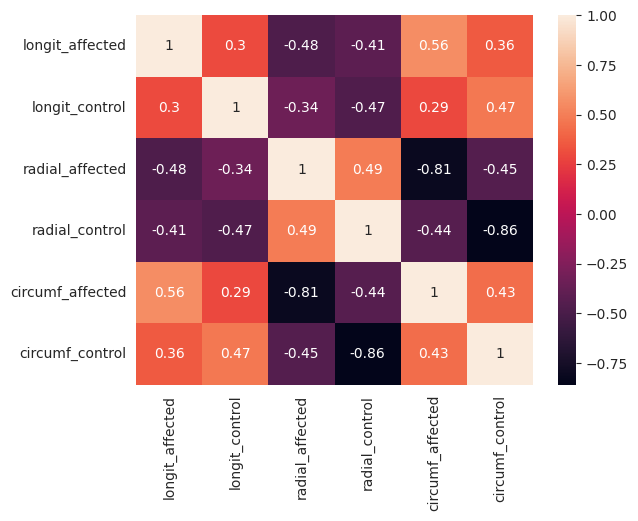

In [35]:
matrix = df_fused.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()
# plt.title(f'Strain rate correlation matrix\nAHA segment {idx} | cases: {threshold}')
# plt.savefig(f'/home/melandur/plot/aha_heatmap_{idx}.png', dpi=300)
# plt.close()
# plt.cla()